In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

### daily stock price movements 

In [2]:
df = pd.read_csv('company_stocks.csv')

In [3]:
companies = df.iloc[:, 0].to_list()
prices = np.array(df.iloc[:, 1:])

### Create a normalizer

In [4]:
normalizer = Normalizer()

### Create a KMeans model with 10 clusters

In [5]:
kmeans = KMeans(n_clusters=10)

### Make a pipeline chaining normalizer and kmeans and fit

In [6]:
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(prices)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

### Predict the cluster labels

In [7]:
labels = pipeline.predict(prices)

### Create a DataFrame aligning labels and companies

In [8]:
df = pd.DataFrame({'labels': labels, 'companies': companies})
df = df.sort_values(by='labels').reset_index(drop=True)
df

,labels,companies
0,0,Apple
1,0,Google/Alphabet
2,1,Intel
3,1,Dell
4,1,Cisco
5,1,HP
6,1,Texas instruments
7,1,Taiwan Semiconductor Manufacturing
8,2,British American Tobacco
9,2,Total


### Hierarchical clustering of the companies

In [9]:
normalized_prices = normalize(prices)
mergings = linkage(normalized_prices, method='complete')

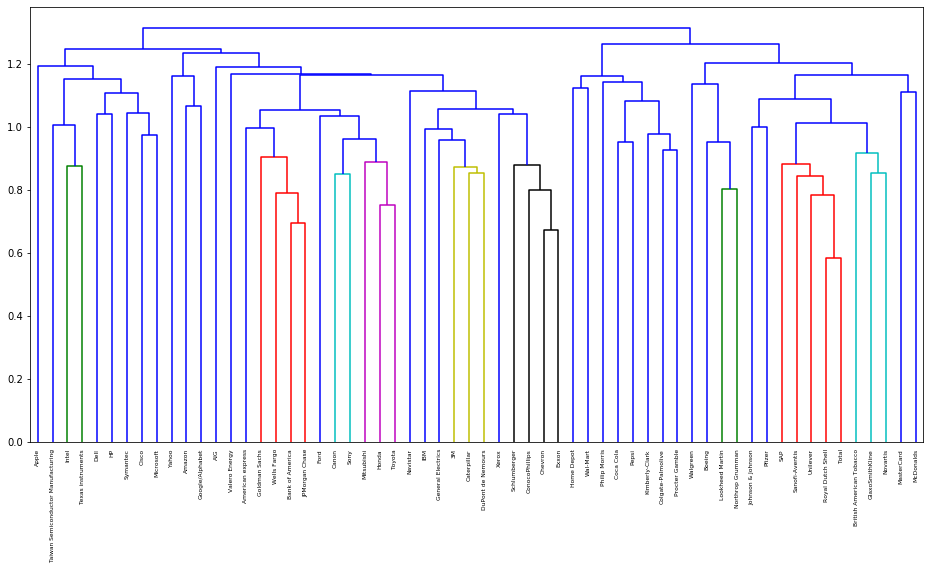

In [10]:
plt.figure(figsize=(16,8))
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()